### Graphs (visualization + observations)

In [1]:
# Read up dataset and show a sample
import pandas as pd

df = pd.read_csv("../EDA_datasets/cleaned_fires.csv")
df.head()

,fire_id,burned_area_ha,date,latitude,longitude,region_id,province_id,municipality_id,municipality,cause_id,deaths,time_to_control_m,time_to_extinguish_m,extinction_cost,economic_loss
0,2001330001,1.0,2001-01-01,43.316626,-5.534401,5,33,6,BIMENES,4,0,143,170,0,0
1,2001390001,3.0,2001-01-01,43.373667,-3.660194,6,39,28,ENTRAMBASAGUAS,5,0,90,389,60,30
2,2001200001,17.0,2001-01-01,43.220963,-1.973224,1,20,72,URNIETA,4,0,150,175,0,46296
3,2001480009,1.0,2001-01-01,43.333288,-3.109978,1,48,71,MUSKIZ,4,0,75,90,120,0
4,2001330007,10.0,2001-01-02,43.118784,-5.428056,5,33,15,CASO,4,0,208,332,0,0


#### Limitations:
- **Time range**: Only covers the period of 2001 - 2021 (incomplete the last 4 years)
- **Cause Granularity**: `cause_id` lacks descriptive labels (not defined types)

## Correlations

**Strongest relationships (Best correlations)**:
1. `time_to_extinguish_m` and `time_to_control_m` **(Correlation: 0.67)**: as the time to control fire increases, the time to extinguish it also leans to increase significantly.
2. `economic_loss` and `burned_area_ha` **(Correlation: 0.39)**: larger burned areas are associated with higher economic losses.
3. `burned_area_ha` and `time_to_extinguish_m` **(Correlation: 0.29)**: larger burned areas leans to take a bit longer to extinguish.

**Weakest relationships (Worst correlations: Closest to zero)**:
1. `deaths` and `time_to_control_m` **(Correlation: 0.028)**: there is almost no linear association between the number of deaths and the time to control the fire.
2. `deaths` and `extinction_cost` **(Correlation: 0.014)**: the number of deaths has almost no linear association with the extinction cost.
3. `burned_area_ha` and `extincion_cost` **(Correlation: 0.09)**: the size of the burned area has a minimal linear association with the extinction cost.

***The weak correlations don't mean there's no relationship at all, just that there isn't a strong linear relationship between those specific variables.*** (see the graph below)

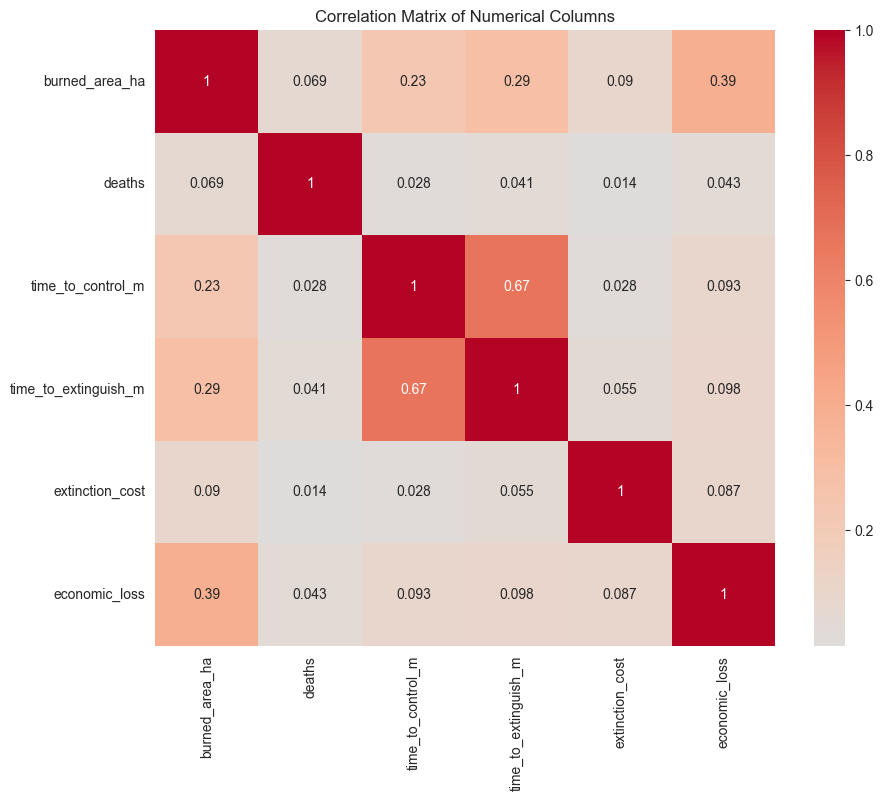

In [2]:
# Correlations of the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = [
    'burned_area_ha', 'deaths', 'time_to_control_m',
    'time_to_extinguish_m', 'extinction_cost', 'economic_loss'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

#### **Graph 1: Number of Fires by Provinces**

In [3]:
# Graph 1
# for a better visualization I found a link with all provinces: https://www.ine.es/daco/daco42/codmun/cod_provincia.htm
province_mapping = {
    1: "Álava",
    2: "Albacete",
    3: "Alicante",
    4: "Almería",
    5: "Ávila",
    6: "Badajoz",
    7: "Balears (Illes)",
    8: "Barcelona",
    9: "Burgos",
    10: "Cáceres",
    11: "Cádiz",
    12: "Castellón",
    13: "Ciudad Real",
    14: "Córdoba",
    15: "A Coruña",
    16: "Cuenca",
    17: "Girona",
    18: "Granada",
    19: "Guadalajara",
    20: "Guipúzcoa",
    21: "Huelva",
    22: "Huesca",
    23: "Jaén",
    24: "León",
    25: "Lleida",
    26: "La Rioja",
    27: "Lugo",
    28: "Madrid",
    29: "Málaga",
    30: "Murcia",
    31: "Navarra",
    32: "Ourense",
    33: "Asturias",
    34: "Palencia",
    35: "Las Palmas",
    36: "Pontevedra",
    37: "Salamanca",
    38: "Santa Cruz de Tenerife",
    39: "Cantabria",
    40: "Segovia",
    41: "Sevilla",
    42: "Soria",
    43: "Tarragona",
    44: "Teruel",
    45: "Toledo",
    46: "Valencia",
    47: "Valladolid",
    48: "Bizkaia",
    49: "Zamora",
    50: "Zaragoza",
}

province_table = pd.DataFrame.from_dict(province_mapping, orient='index', columns=['Province Name'])
print(province_table)

             Province Name
1                    Álava
2                 Albacete
3                 Alicante
4                  Almería
5                    Ávila
6                  Badajoz
7          Balears (Illes)
8                Barcelona
9                   Burgos
10                 Cáceres
11                   Cádiz
12               Castellón
13             Ciudad Real
14                 Córdoba
15                A Coruña
16                  Cuenca
17                  Girona
18                 Granada
19             Guadalajara
20               Guipúzcoa
21                  Huelva
22                  Huesca
23                    Jaén
24                    León
25                  Lleida
26                La Rioja
27                    Lugo
28                  Madrid
29                  Málaga
30                  Murcia
31                 Navarra
32                 Ourense
33                Asturias
34                Palencia
35              Las Palmas
36              Pontevedra
3

In [4]:
# changing the column for the new visualisation
df["province_name"] = df["province_id"].map(province_mapping)
df["province_id_name"] = df["province_id"].astype(str) + " - " + df["province_name"]

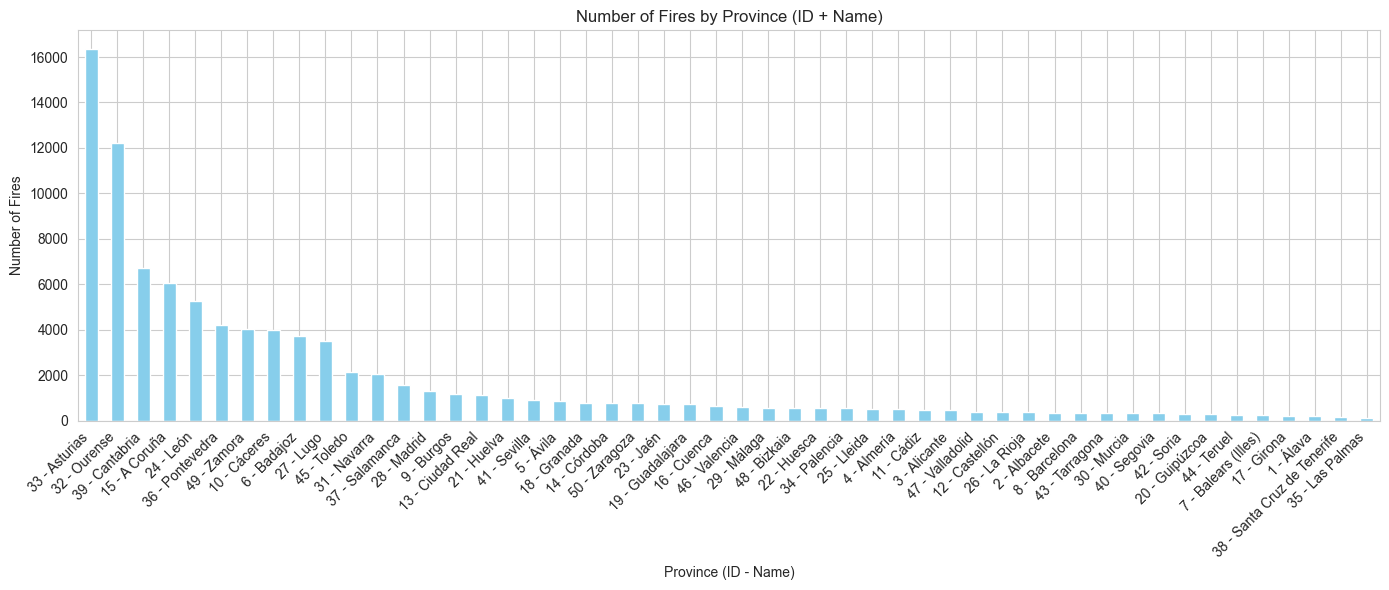

In [5]:
import matplotlib.pyplot as plt

# Group by combined ID + Name
fires_by_province = df["province_id_name"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
fires_by_province.plot(kind='bar', color='skyblue')
plt.title("Number of Fires by Province (ID + Name)")
plt.xlabel("Province (ID - Name)")
plt.ylabel("Number of Fires")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Visualization Type**: Vertical Bar Plot

**Axes**:
- **X-axis**: **Province (ID + Name)**: lists the different provinces recorded in the dataset. Each bar corresponds to a specific province, identified by a numerical ID followed by its name.
- **Y-axis**: **Number of Fires**: represents the total number of fire incidents recorded in each of the provinces listed on the horizontal axis. The height of the bar corresponds to the count of fires in that particular province.

**Data Interpretation**
- **Asturias (33) has the Highest Number of Fires:** The tallest bar corresponds to `33 - Asturias`, indicating the province experienced the highest number of fire incidents with a count of over 16,000 fires.
- **Ourense (32) is Second Highest:** It takes the second-highest bar, indicating that the provinces listed on the left experienced a higher frequency of fires compared to those on the right.
- **Significant Variation in Fire Counts:** There is a difference in the number of fires across different provinces. Provinces on the right has significantly lower numbers.
- **Provinces with Very Few Fires:** The bars on the right are very short, indicating some provinces experienced a relatively small number of fire incidents. For example, provinces like `35 - Las Palmas` and `38 - Santa Cruz de Tenerife` appear to have very few recorded (close to 0).

**Insights & Potential Questions**
- Are they from the same parts of the country? This could indicate shared environmental factors environmental to wildfires (e.g., climate, vegetation type).
- The visualization highlights the provinces most affected. Further investigation could explore the potential causes of these high wildfire numbers. Are there specific human activities or natural factors that are more prevalent in these areas?

#### **Graph 2: Number of Wildfires per Year**

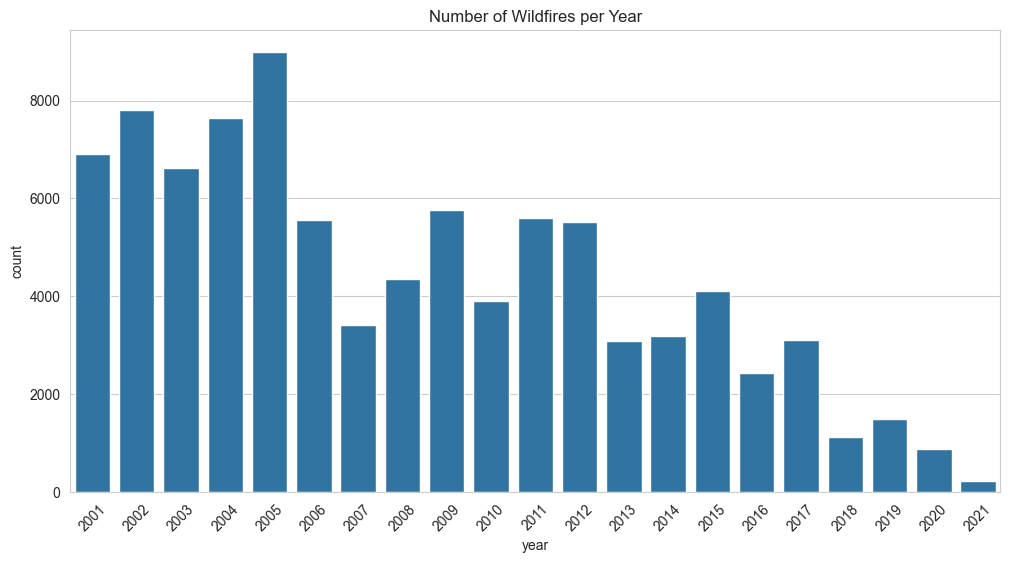

In [6]:
# Graph 2
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Fires per year
plt.figure(figsize=(12,6))
df['year'] = df['date'].dt.year
sns.countplot(x='year', data=df)
plt.title('Number of Wildfires per Year')
plt.xticks(rotation=45)
plt.show()

**Visualization Type**: Bar Plot

**Axes**:
- **X-axis**: **Year**
- **Y-axis**: **Wildfire Count**

**Data Interpretation**
- **Peak in 2005:** The tallest bar is in 2005, indicating this year had the highest number of fires recorded during the observed period, with a count of ***over 9,000 wildfires***.
- **High activity in Early 2000s:** The ***period 2001 - 2004** show a relatively high number of wildfires, generally above ***6,000*** fires per year.
- **Dip in 2007:** There seems to be a significantly lower count that the surrounding years ***(over 2,500 fires)***.
- **Lower Numbers in Recent Years:** The number of fires appears to be lower in the later years ***(from 2018 to 2021)***, compared to earlier years. ***Year 2020 and 2021 show low counts.***

**Insights & Potential Questions**

The spikes between 2001 and 2005 likely resulted from a combination of extreme weather conditions, accumulated fuels (e.g., dry vegetation), and increased human activity—whether accidental or intentional. While the baseline risk was already elevated due to Spain’s naturally warm climate, these specific years were compounded by prolonged droughts and heatwaves, creating ideal conditions for wildfires to ignite and spread.

This emphasizes that while climate change steadily increases the background risk over time, inter-annual variability—such as human behavior, fuel buildup, and weather anomalies—often determines the actual peaks in wildfire activity.

#### **Graph 3: Number of Wildfires per Month**

In [7]:
# Graph 3
# for a better visualization we change the number to months
months = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

months_table = pd.DataFrame.from_dict(months, orient='index', columns=['Months View'])
print(months_table)

   Months View
1          Jan
2          Feb
3          Mar
4          Apr
5          May
6          Jun
7          Jul
8          Aug
9          Sep
10         Oct
11         Nov
12         Dec


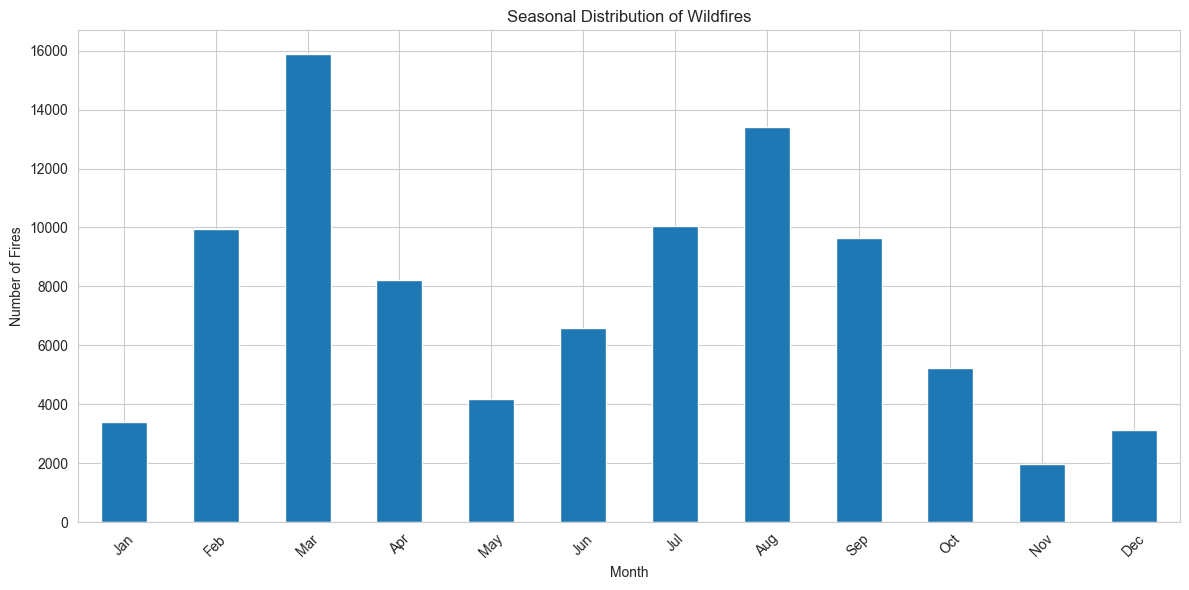

In [8]:
# changing the column for the new visualisation
df['month'] = df['date'].dt.month # Transformed based on the month
df["months_name"] = df["month"].map(months)

# Count fires by month and sort by month number (not alphabetically)
fires_by_month = df["month"].value_counts().sort_index().rename(index=months)

plt.figure(figsize=(12,6))
fires_by_month.plot(kind='bar')
plt.title('Seasonal Distribution of Wildfires')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visualization Type**: Bar Plot

**Axes**:
- **X-axis**: **Month (January-December)**
- **Y-axis**: **Number of Fires**

**Data Interpretation**
- **Peak in March:** The tallest bar is in March, indicating this month with the ***highest number of recorded wildfires.***
- **High Activity in February and August:** ***February and August*** show a significantly high number of wildfires, although not as high as March.
- **High Activity in July and September:** ***July and September*** also experience a considerable number of fires.
- **Low Activity in May and June:** They show a noticeable decrease compared to the months surrounding them.
- **Generally lower Activity in Winter:** ***November, December and January***, show a lower number compared to peak months. ***November has the lowest among all months.***

**Insights & Potential Questions**
- The strong peak in March and August suggests a strong seasonal pattern in wildfire occurrences. This could be linked to factors such as higher temperatures, drier conditions and increased human outdoor activities.
- This pattern likely reflects the influence of climate and weather patterns. Further analysis could explore the correlation between temperature, humidity and wind patterns.
- This could also coincide with the increased human presence in natural areas during the summer and spring peak, potentially leading to more accidental or intentional ignitions.

#### **Graph 4: Distribution of fire areas**

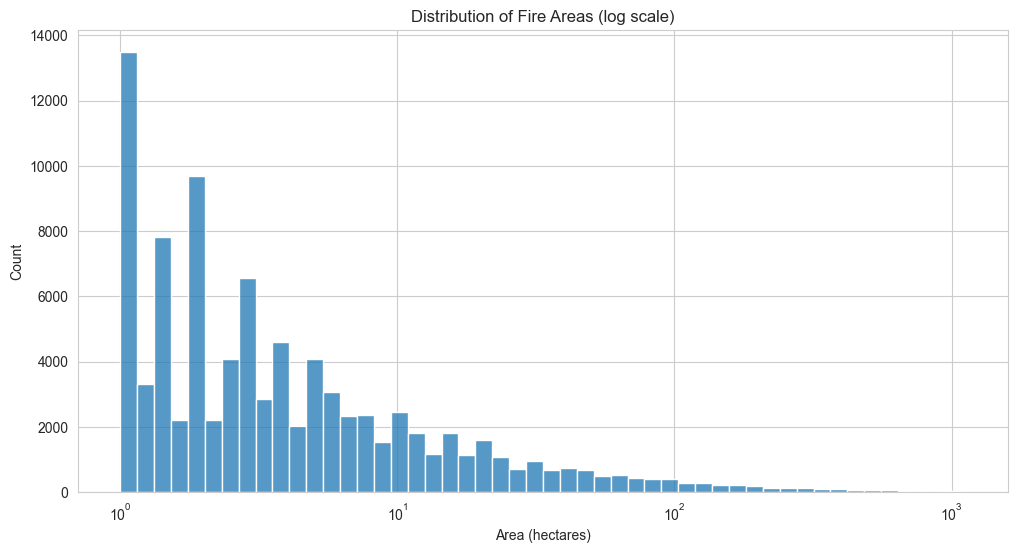

In [9]:
# Graph 4
# Area distribution (log scale)
plt.figure(figsize=(12,6))
sns.histplot(df['burned_area_ha'], bins=50, log_scale=True)
plt.title('Distribution of Fire Areas (log scale)')
plt.xlabel('Area (hectares)')
plt.show()

**Visualization Type**: Histogram

**Axes**:
- **X-axis**: **Area (hectares)**: Represents the size of the fire, measured in hectares. Each mark is represented by the power of 10, allowing to visualize data where there's a wide range of values, from very small fires to very large ones, without the smaller values being compressed.
- **Y-axis**: **Count**: Represents the number of fires that fall within each area range on the horizontal axis. The height of each bar indicates how many fires had an area within that specific range.

**Data Interpretation**
- The tallest bars are clustered towards the left part of the graph. As the fire area increases, the number of fires in each size category drops. ***It results in many small fires and fewer larger ones.***
- **Frequency of Small Fires:** The higher bar on the left indicates that fires with areas around 1 hectare or less are the most frequent.
- **Decreasing Frequency of Small Fires:** Moving to the right, the height of the bars decreases, indicating that larger and larger fires become less common.

#### **Graph 5: Distribution of Fatalities per Fire**

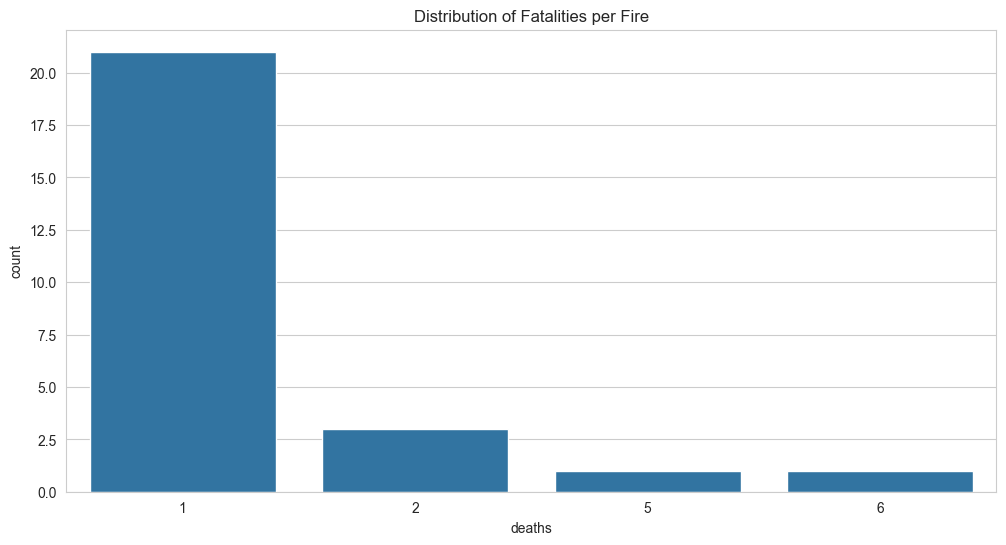

In [10]:
# Graph 5
# Fatalities
plt.figure(figsize=(12,6))
sns.countplot(x='deaths', data=df[df['deaths'] > 0])
plt.title('Distribution of Fatalities per Fire')
plt.show()

**Visualization Type**: Bar Plot

**Axes**:
- **X-axis**: **Deaths**:
- **Y-axis**: **Count**:

**Data Interpretation*u*

- **Common Low Fatality:** The majority of fires resulted in only one fatality. This suggests that fatal fire incidents intend to involve at least a single loss of life.
- **Rare Multiple Fatality:** The number of fires causing two, five, or six deaths is significantly lower than those causing one death.
- **Focus on Prevention:** The prevalence of single-fatality fires underscores the importance of prevention measures aimed at avoiding even one death.

**Insights & Potential Questions**
- Understanding the context of these the circumstances surrounding the fires with multiple fatalities could offer valuable lessons for prevention and response strategies.
- While this graph focuses on fatalities, understanding the broader impact of fires on human health (including injuries) would be beneficial.


#### **Graph 6: Top 7 Municipalities by Total Economic Loss**

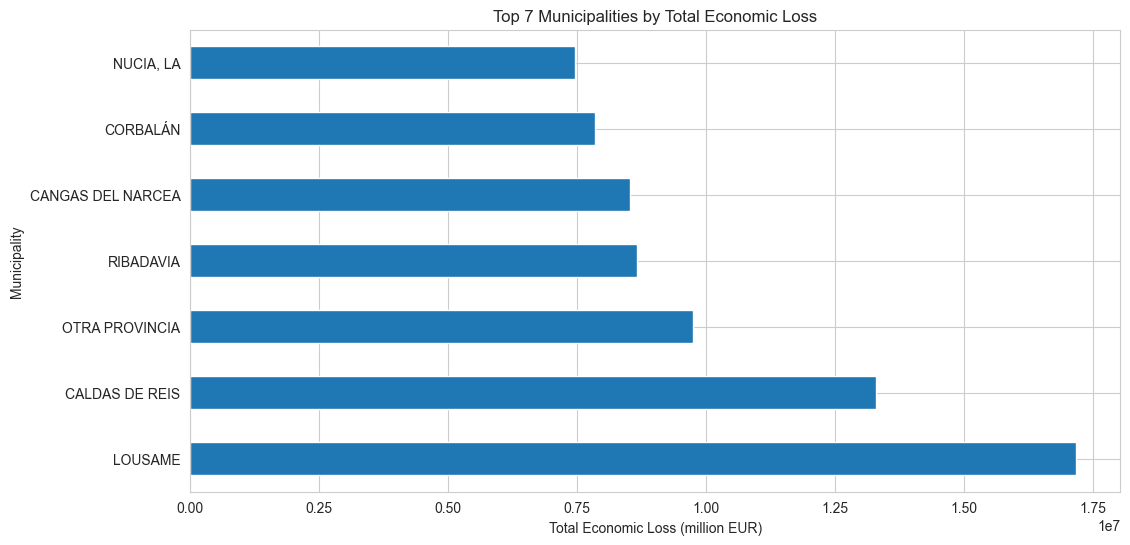

In [11]:
# Graph 6
top_municipalities = df.groupby('municipality')['economic_loss'].sum().nlargest(7)

plt.figure(figsize=(12,6))
top_municipalities.plot(kind='barh')
plt.title('Top 7 Municipalities by Total Economic Loss')
plt.xlabel('Total Economic Loss (million EUR)')
plt.ylabel('Municipality')
plt.grid(True)
plt.show()

**Visualization Type**: Horizontal Bar Plot

**Axes**:
- **X-axis**: **Area (hectares)**: Represents the size of the fire, measured in hectares. Each mark is represented by the power of 10, allowing to visualize data where there's a wide range of values, from very small fires to very large ones, without the smaller values being compressed.
- **Y-axis**: **Count**: Represents the number of fires that fall within each area range on the horizontal axis. The height of each bar indicates how many fires had an area within that specific range.

**Data Interpretation**
- **Significant Economic Display:** There is a considerable difference in the total economic losses experienced in the top 7 municipalities. ***Lousame suffered higher losses compared to the other municipalities in this group.***
- **Regional Impact:** The graph highlights a regional patterns in the fire occurrence and the value of assets at risk, making municipalities showcasing greater vulnerability to damaging fires or a history of particularly costly fire incidents.

**Insights & Potential Questions**
- Investigating the characteristics of the fires in Lousame could provide valuable insights of why it experienced higher economic losses compared to others.
- What specific measures are in place or could be implemented in these high-loss municipalities to reduce future economic impact from fires?
- Analyzing trends in economic losses per municipality could reveal more details of the impact - was it among the top in terms of economic loss over time?

#### **Graph 7: Total Extinction cost based on burned areas**

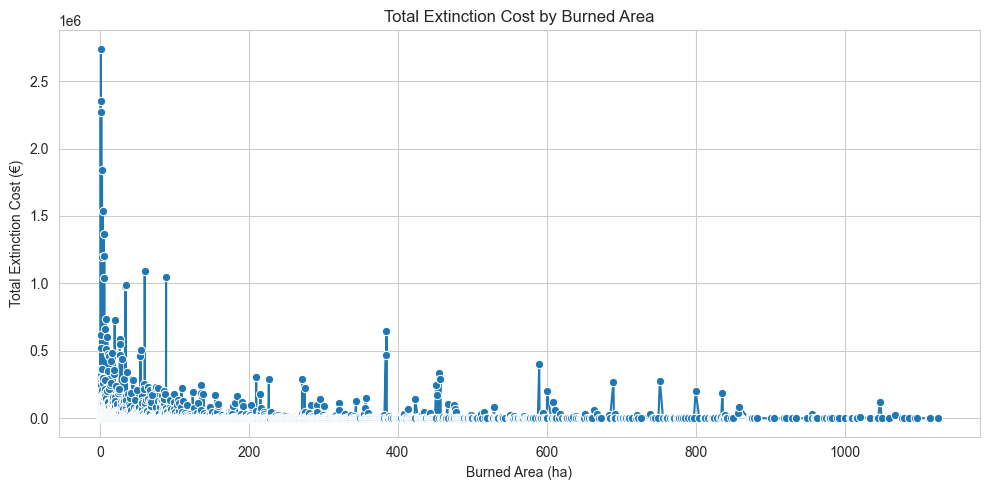

In [12]:
# Graph 7
# Group by burned area and sum extinction costs
cost_by_area = (
    df.groupby("burned_area_ha")["extinction_cost"]
    .sum()
    .reset_index()
    .sort_values("burned_area_ha")
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=cost_by_area, x="burned_area_ha", y="extinction_cost", marker="o")
plt.title("Total Extinction Cost by Burned Area")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Total Extinction Cost (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Visualization Type**: Scatter Plot

**Axes**:
- **X-axis**: **Burned Area (ha)**:  This axis represents the size of each fire, measured in hectares. The values range from approximately 0 to over 1000 hectares.
- **Y-axis**: **Total Extinction Cost (€)**: This axis represents the total cost associated with extinguishing each fire, measured in Euros. The values range from 0 to over 2.5 million Euros.
- **Points**: Each point on the graph represents a single fire incident. The position of the point is determined by its corresponding burned area (on the horizontal axis) and total extinction cost (on the vertical axis).

**Data Interpretation**
- **High-Cost Outliers for Small Fires:** The presence of several points with high extinction costs for small burned areas ***suggests that factors other than just the size of the fire heavily influence the cost.*** These could include the location, type of vegetation, proximity to infrastructure, difficulty of access, or the resources deployed.
- **Mid-Sized Fires:** For fires with moderate burned areas (e.g., between 10 and 200 hectares), there's a wide range of extinction costs, indicating that different circumstances lead to varying expenditure.
- **Lower Costs for Many Larger Fires:** Many fires with larger burned areas (beyond a few hundred hectares) have relatively lower extinction costs compared to some of the costly smaller fires. This might suggest different firefighting strategies or that these larger fires occurred in less challenging or less valuable areas.

**Insights & Potential Questions**

***As viewed the graphs before, two questions comes to mind:***
1. ***What are the specific factors that lead to very high extinction costs for relatively small fires?***
  - Small fires can give high extinction costs when they occur near populated areas or critical infrastructure, requiring rapid deployment of expensive aerial suppression and intensive manpower to prevent escalation.
2. ***Why do some large fires have lower extinction costs than some smaller ones?***
  - Large fires may have lower costs when they occur in remote, low-risk areas where suppression efforts are minimized or a "let-burn" strategy is adopted due to limited threat to life or property.

In [13]:
# Read dataset and showcase sample
import pandas as pd

df_weather = pd.read_csv("../EDA_datasets/cleaned_weather_data_2001-2021.csv")
df_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-01,0.0,14.1,18.6,9.0
1,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-02,1.2,11.3,13.5,9.5
2,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-03,6.5,10.9,14.0,7.0
3,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-04,5.4,14.6,18.2,10.4
4,SPE00119792,"ASTURIAS AVILES, SP",43.5667,-6.0442,127.0,2001-01-05,5.6,14.0,20.0,8.8


#### Limitations:
- **Time range**: Only covers the period of 2001 - 2021 (incomplete the last 4 years).
- **Humidity and Wind Values**: Currently, the dataset does not have humidity and wind, but in the future, they could be implemented.

## Correlations

**Strongest relationships (Best correlations)**:
1. `TMAX` and `TAVG` **(Correlation: 0.96)**
2. `TAVG` and `TMIN` **(Correlation: 0.94)**
3. `TMAX` and `TMIN` **(Correlation: 0.84)**

**Weakest relationships (Worst correlations: Closest to zero)**:
1. `PRCP` and `TMIN` **(Correlation: -0.057)**
2. `ELEVATION` and `TMIN` **(Correlation: -0.46)**
3. `ELEVATION` and `TMAX` **(Correlation: -0.41)**

***The weak correlations don't mean there's no relationship at all, just that there isn't a strong linear relationship between those specific variables.*** (see the graph below)

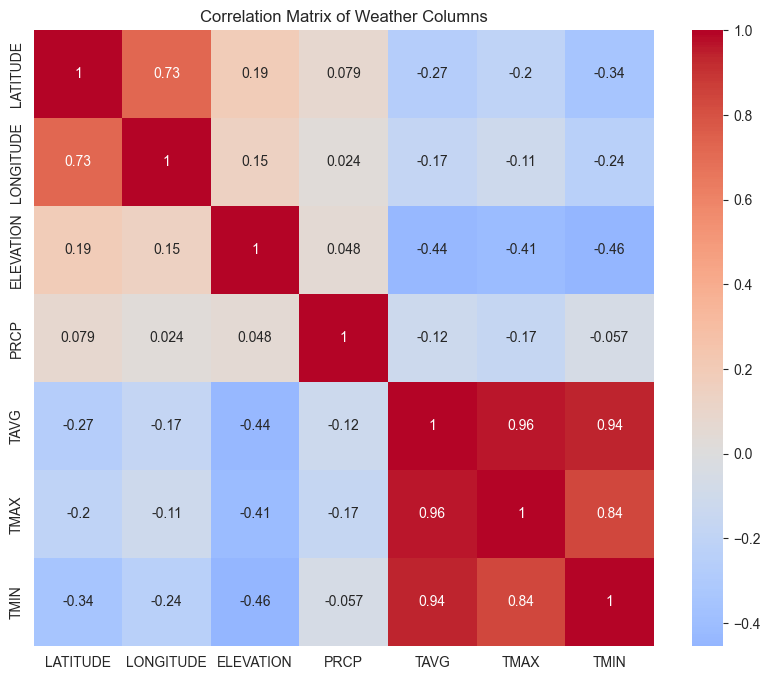

In [14]:
# Correlations of the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
weather_columns = [
    'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'TAVG', 'TMAX', 'TMIN'
]

# Calculate the correlation matrix
correlation_matrix = df_weather[weather_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Columns')
plt.show()

#### **Graph 8: Average Temperature Trend through the years**

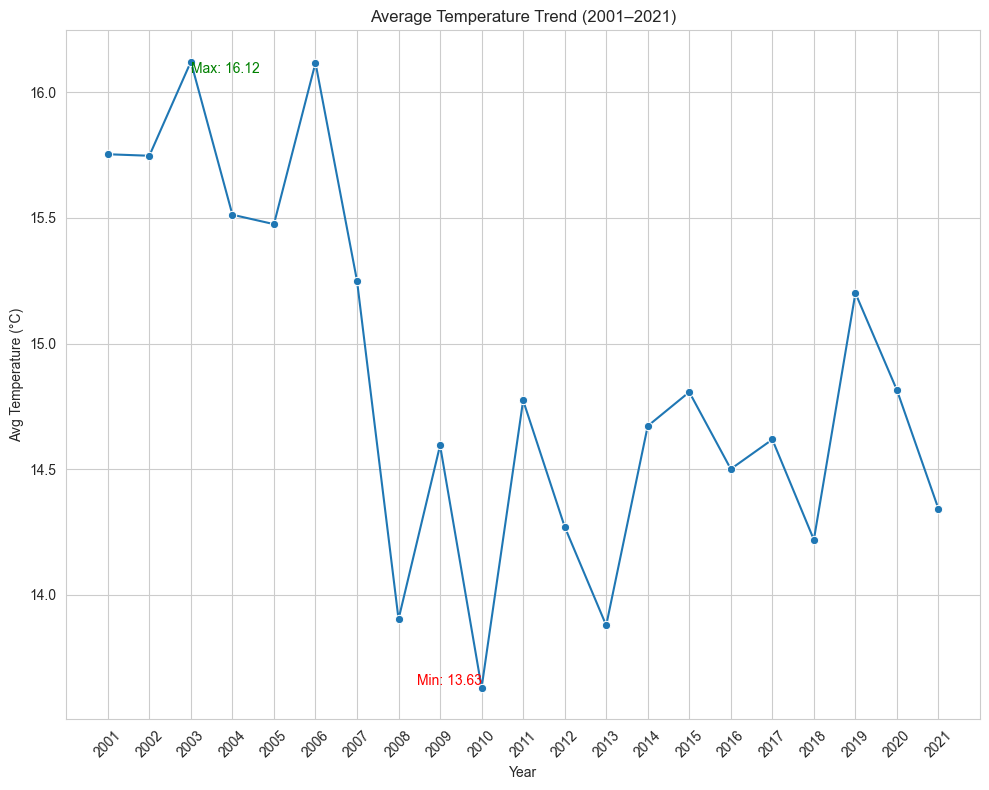

In [15]:
# Graph 1
# Convert DATE column to datetime
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# Create a 'Year' column for yearly trends
df_weather['Year'] = df_weather['DATE'].dt.year

# 1. Average temperature trend over the years
yearly_avg_temp = df_weather.groupby('Year')['TAVG'].mean()

# Identify min/max for annotation
min_year = yearly_avg_temp.idxmin()
max_year = yearly_avg_temp.idxmax()

# Retry plotting with formatted x-axis ticks as integers
plt.figure(figsize=(10, 8))
sns.lineplot(x=yearly_avg_temp.index, y=yearly_avg_temp.values, marker="o")

# Annotate min and max
plt.text(min_year, yearly_avg_temp[min_year], f"Min: {yearly_avg_temp[min_year]:.2f}", color="red", ha="right", va="bottom")
plt.text(max_year, yearly_avg_temp[max_year], f"Max: {yearly_avg_temp[max_year]:.2f}", color="green", ha="left", va="top")

plt.title("Average Temperature Trend (2001–2021)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(ticks=yearly_avg_temp.index, labels=yearly_avg_temp.index.astype(int), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Visualization Type**: Bar Plot

**Axes**:
- **X-axis**: **Year** (ranging from 2001 to 2021)
- **Y-axis**: **Avg Temperature** (in Celsius)

**Data Interpretation**
- **Overall Trend**: Temperature varies significantly from year to year. There isn't a consistent increasing or decreasing linear trend over the entire period.
- **Maximum Temperature**: Highest average temperature recorded is 16.12 °C, which occurred in 2003.
- **Minimum Temperature**: The lowest average temperature recorded is 13.63 °C, which occurred in 2009.
- **Peaks:** High peaks are observed around 2003 (16.12 °C) and 2006 (approximately a bit over 16.0 °C). Another relatively high peak is in 2019 (over 15.0 °C).
- **Recent Years (2018-2021)**: After a dip in 2018, there's a significant increase in 2019, a slight decrease in 2020 and a decrease in 2021.

**Observations**

The early years of the dataset show that average temperatures were significantly higher than those recorded more recently. This trend may be linked to several factors, including long-term climate trends or the effects of climate change mitigation efforts. Understanding this pattern provides better insight into the reasons for the high number of wildfires in the first decade, suggesting it could be one of the primary causes of wildfire occurrences during that time.

#### **Graph 9: Average Precipitation Trend through the years**

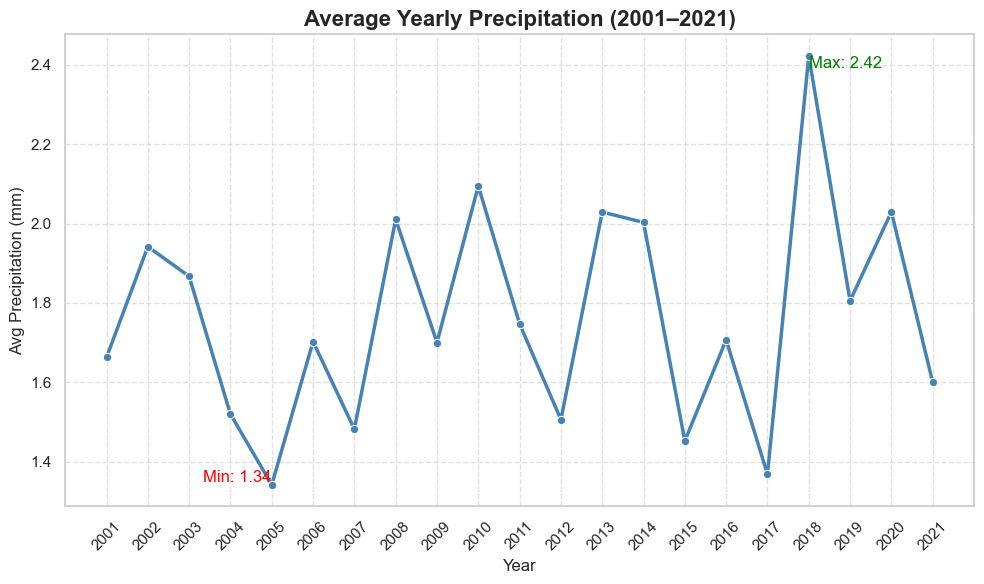

In [16]:
# Graph 2
# Group precipitation by year
yearly_prcp = df_weather.groupby('Year')['PRCP'].mean()

# Identify min/max for annotation
min_year = yearly_prcp.idxmin()
max_year = yearly_prcp.idxmax()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot with style
sns.lineplot(x=yearly_prcp.index, y=yearly_prcp.values, marker='o', color='steelblue', linewidth=2.5)

# Annotate min and max
plt.text(min_year, yearly_prcp[min_year], f"Min: {yearly_prcp[min_year]:.2f}", color="red", ha="right", va="bottom")
plt.text(max_year, yearly_prcp[max_year], f"Max: {yearly_prcp[max_year]:.2f}", color="green", ha="left", va="top")

# Titles and labels
plt.title("Average Yearly Precipitation (2001–2021)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Avg Precipitation (mm)", fontsize=12)
plt.xticks(ticks=yearly_prcp.index, labels=yearly_prcp.index.astype(int), rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Visualization Type**: Bar Plot

**Axes**:
- **X-axis**: **Year** (ranging from 2001 to 2021)
- **Y-axis**: **Avg Precipitation**: (in millimeters)

**Data Interpretation**
- **Overall Trend**: Precipitation varies significantly from year to year. There isn't a consistent increasing or decreasing linear trend over the entire period.
- **Maximum Precipitation**: The highest average precipitation recorded is 2.42 mm in 2018.
- **Minimum Temperature**: The lowest average precipitation recorded is 1.34 mm, which occurred in 2005.
- **Peaks:** The second and third-highest peaks are in 2010 (approximately 2.1 mm) and two years after the highest (recorded in 2020 - a bit over 2.0 mm).
- **Recent Years (2018-2021)**: After reaching the highest point, there was a dip in 2019, which slightly increased a year later before experiencing another dip in 2021, totalling 1.6 mm.

**Observations**

Over the last four years, the average precipitation has fluctuated, with both increases and decreases. This variation allows the ground to absorb more water, making it more resistant to catching or starting fires.
The wildfire dataset suggests that one of the main reasons for the increase in wildfires during the first decade is the combination of high temperatures and low precipitation. This results in drier ground, which can easily catch fire.

#### **Graph 10: Distribution of the average temperatures**

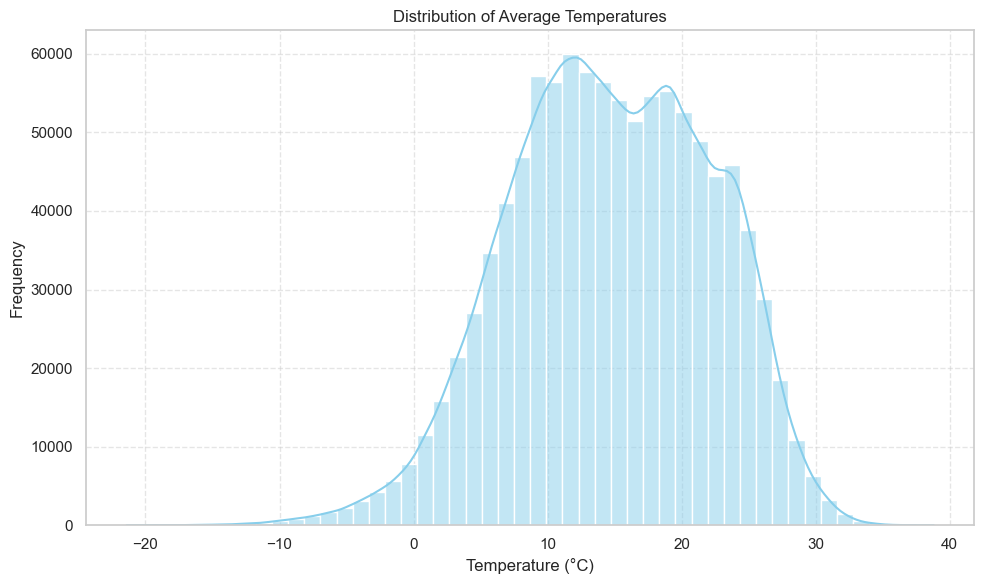

In [17]:
# 3. Distribution of average temperatures
# Drop missing values
temps = df_weather['TAVG'].dropna()

# Get min and max
temp_min = temps.min()
temp_max = temps.max()

# Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(temps, bins=50, kde=True, color="skyblue")

# Labels and title
plt.title("Distribution of Average Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**Visualization Type**: Histogram

**Axes**:
- **X-axis**: **Temperature** (in Celsius)
- **Y-axis**: **Frequency** (number of times a particular average of temperature has occurred)

**Observations**

- Overall: there can be seen two distinct peaks. This suggests there are two common ranges of average temperatures that occur with high frequency.
    - first peak appears to be around 12-14 °C.
    - second peak is around 19-21 °C.
- Range of Temperatures: the distribution is not symmetrical. It has a bigger tail towards the lower temperatures and shorter second tail towards the higher temperatures.
- Frequency: The higher frequency (50,000) is observed around two peaks. They seem to drop after moving away from the central peaks.


#### **Graph 11: Distribution of the average temperatures every month**

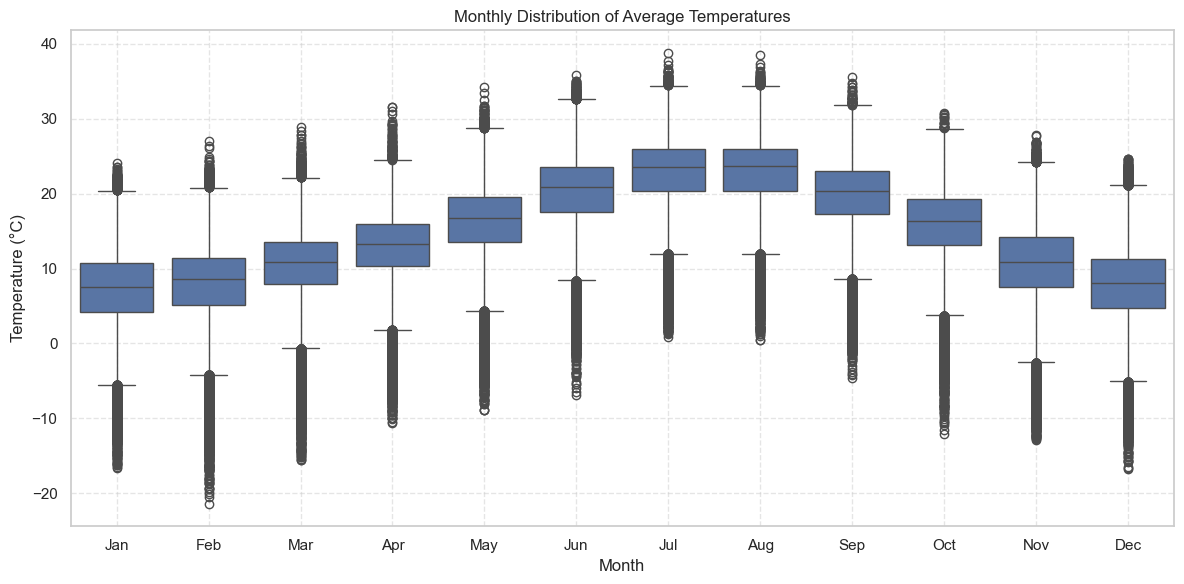

In [18]:
# Add month names
import calendar

df_weather['Month'] = df_weather['DATE'].dt.month
df_weather['MonthName'] = df_weather['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot boxplot of average temperatures per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthName', y='TAVG', data=df_weather, order=calendar.month_abbr[1:])  # Jan–Dec
plt.title("Monthly Distribution of Average Temperatures")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Visualization Type**: Box plot

**Axes**:
- **X-axis**: **Month** (from Jan to Dec)
- **Y-axis**: **Temperature**: (in Celsius)

**Data Interpretation**
Key Observations (Explanation of the Box Plot:
- Median (Middle line of the Box): Represent the average temperature for every month.
- Interquartile Range (IQR - the Box): shows the middle 50% of the temperature data for the month. The bigger the box means more variability in temperatures for that month.
- Whiskers (Lines extending from the Box): Extends to at least 1.5 times the box from the quartiles, showing the range of data excluding outliers.
- Outliers (Individual Points beyond Whiskers): Represent unusually high or low average temperatures for that specific month.

**Observations**

Observations from data:
- Seasonal trend: Temperatures are lowest in winter (Dec, Jan, Feb), gradually rise through spring (Mar, Apr, May), show their peak in summer (Jun, Jul, Aug) and gradually decrease through autumn (Sep, Oct, Nov)
- Winter months: Jan and Feb have the lowest median temperatures, suggesting they are typically the coldest months.
- Spring months: Temperatures steadily rise. The median temperature of May is higher than March, showing a clear transition.
- Summer months:
  - Highest Medians: July and August consistently show the highest median temperatures, indicating they are typically the warmest months.
    - Relatively Stable Medians: The median temperatures for these three months are quite similar, suggesting a sustained warm period.
    - High Outliers: Several high outlier points are present, especially in July and August, indicating instances of unusually hot average monthly temperatures.
- Autumn months:
  - Temperatures slowly decrease, despite September showing relatively warm temperatures. In November, we start to see more winter values.

Overall:

Months with extreme temperatures (winter and summer) tend to show a wider range of values, including more distinct outliers, reflecting greater variability in average temperatures during these periods. The transition months (spring and autumn) also exhibit significant ranges.

#### **Graph 12: Distribution of the maximum temperature in every month**

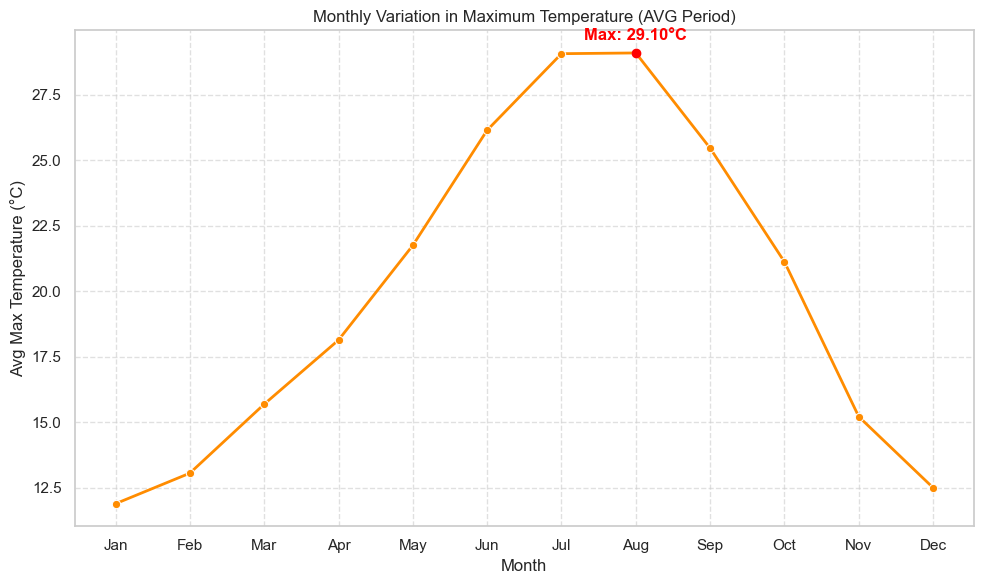

In [19]:
# Graph 4

# Group by month for average TMAX
monthly_tmax = df_weather.groupby('Month')['TMAX'].mean()

# Get the month with the highest average TMAX
max_month = monthly_tmax.idxmax()
max_value = monthly_tmax.max()

# Convert month numbers to names for labels
month_names = [calendar.month_abbr[m] for m in monthly_tmax.index]

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_tmax.index, y=monthly_tmax.values, marker='o', linewidth=2, color='darkorange')

# Highlight the max point
plt.scatter(max_month, max_value, color='red', zorder=5)
plt.text(max_month, max_value + 0.5, f"Max: {max_value:.2f}°C", ha='center', color='red', fontweight='bold')

# Apply month names
plt.xticks(ticks=monthly_tmax.index, labels=month_names)

# Labels and styling
plt.title("Monthly Variation in Maximum Temperature (AVG Period)")
plt.xlabel("Month")
plt.ylabel("Avg Max Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Visualization Type**: Line PLot

**Axes**:
- **X-axis**: **Month** (from Jan to Dec)
- **Y-axis**: **AVG Temperature**: (in Celsius)

**Observations**

- Winter:
January has the lowest average maximum temperature, just above 12.5 °C.
February shows a slight increase from January.

- Spring:
From March to June, there's a steady and significant increase in the average maximum temperatures.
April sees temperatures rise to around 18 °C. May crosses the 20 °C mark, while June approaches 26 °C.

- Summer:
The highest average maximum temperature is 29.10 °C, occurring in August.
July also shows a very high average maximum temperature, very close to the peak, indicating a sustained period of warmth in mid-summer.
- Autumn:
From September to December, there's a consistent decrease in the average maximum temperatures.
September is still relatively warm, above 25 °C.
October drops to around 21 °C.
November sees a more significant drop, and December returns to the lowest range.

Conclusion: August is, on average, the month with the highest maximum temperatures over the analyzed period.
